# EDA
- Fuel Consumption : 100km에 소비하는 양
- Fuel Consumption Comb : City/Hwy = 55/45 비율로 섞음
- mpg * 0.425 = KM/L (연비)
- 의문
    1. 여러 변수와 co2 배출량 사이의 관계
    2. co2 배출에 가장 큰 영향을 끼치는 변수
    3. city와 hwy에 따라 배출량이 다를까

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Fuel Consumption Comb calculated?

In [6]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
v1 = data['Fuel Consumption City (L/100 km)']
v2 = data['Fuel Consumption Hwy (L/100 km)']
v3 = data['Fuel Consumption Comb (L/100 km)']
A = np.column_stack([v1, v2])
x = np.linalg.lstsq(A, v3, rcond=-1)
print(x[0])

[0.54977202 0.45035134]


In [27]:
## 오브젝트 타입 확인
data.describe(include=['O'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


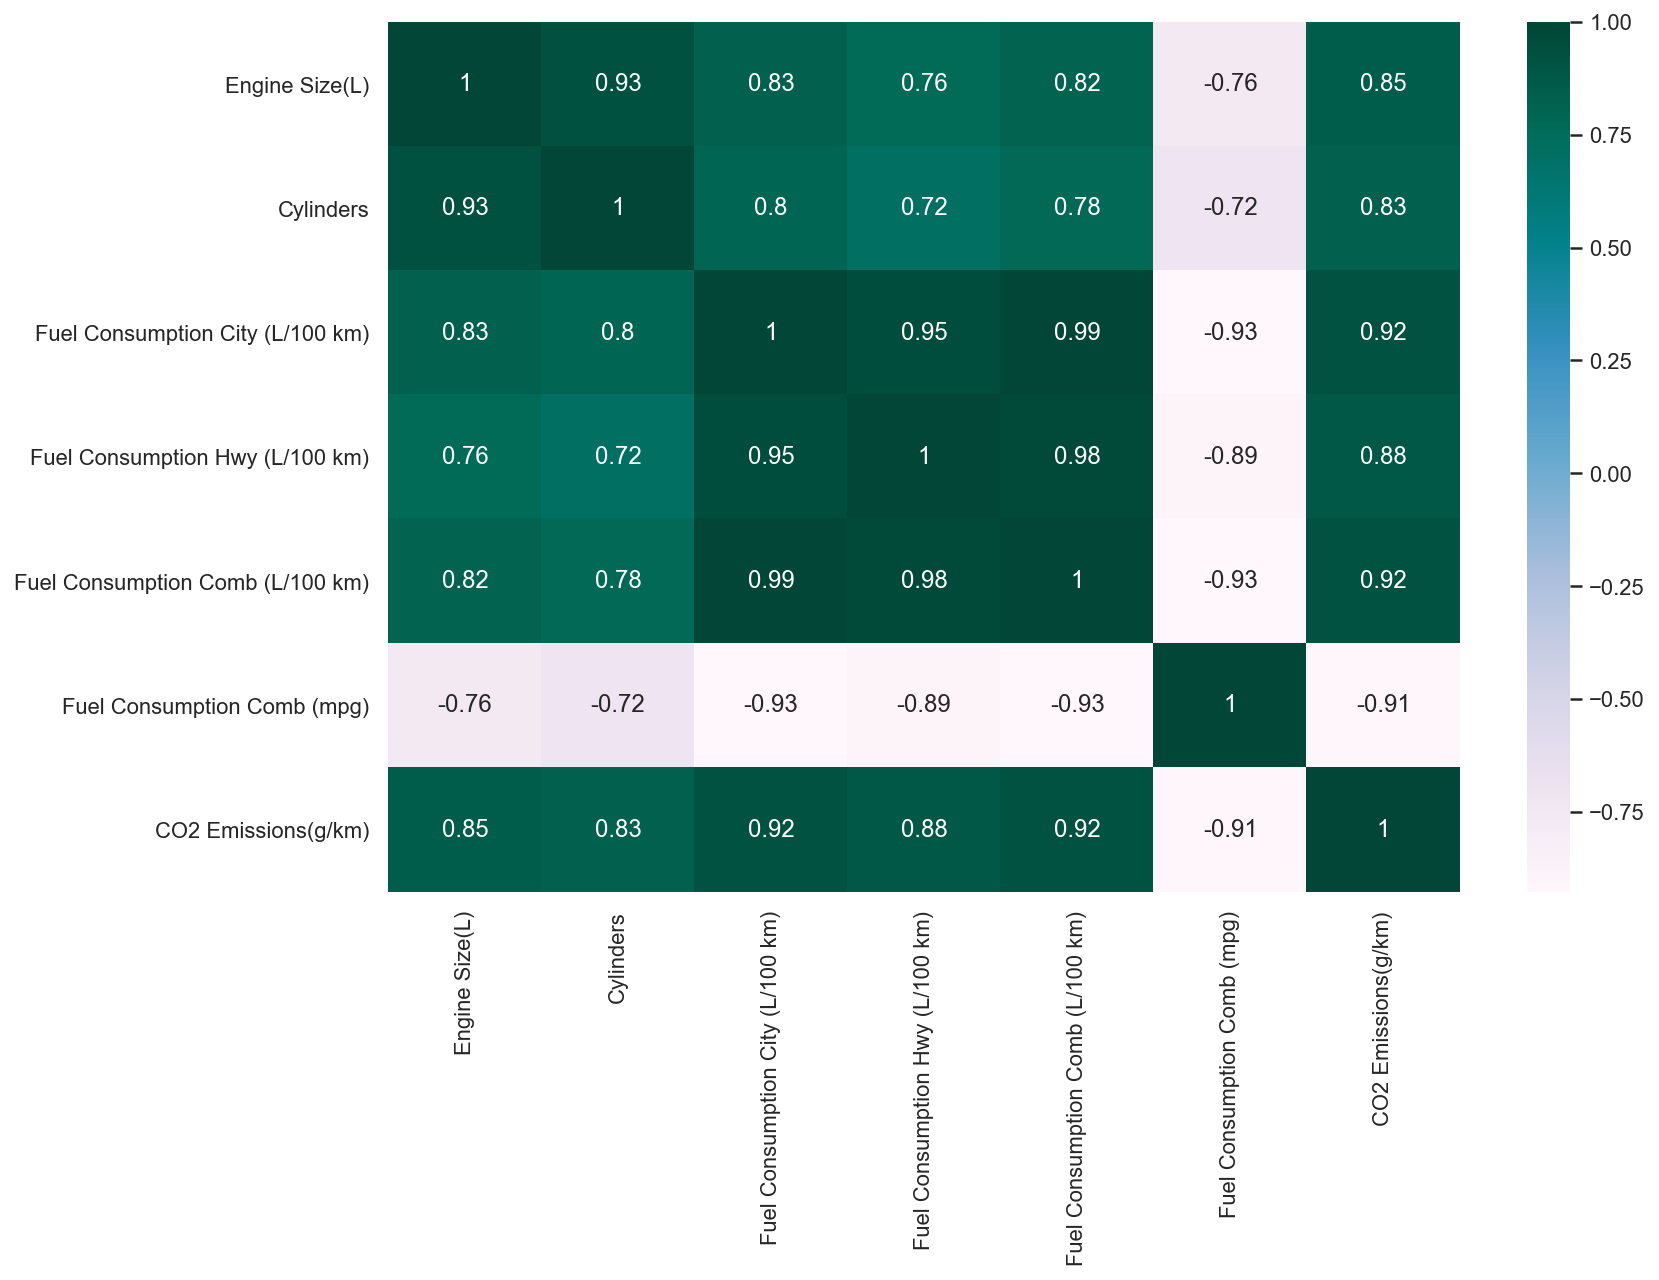

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="PuBuGn", annot=True);

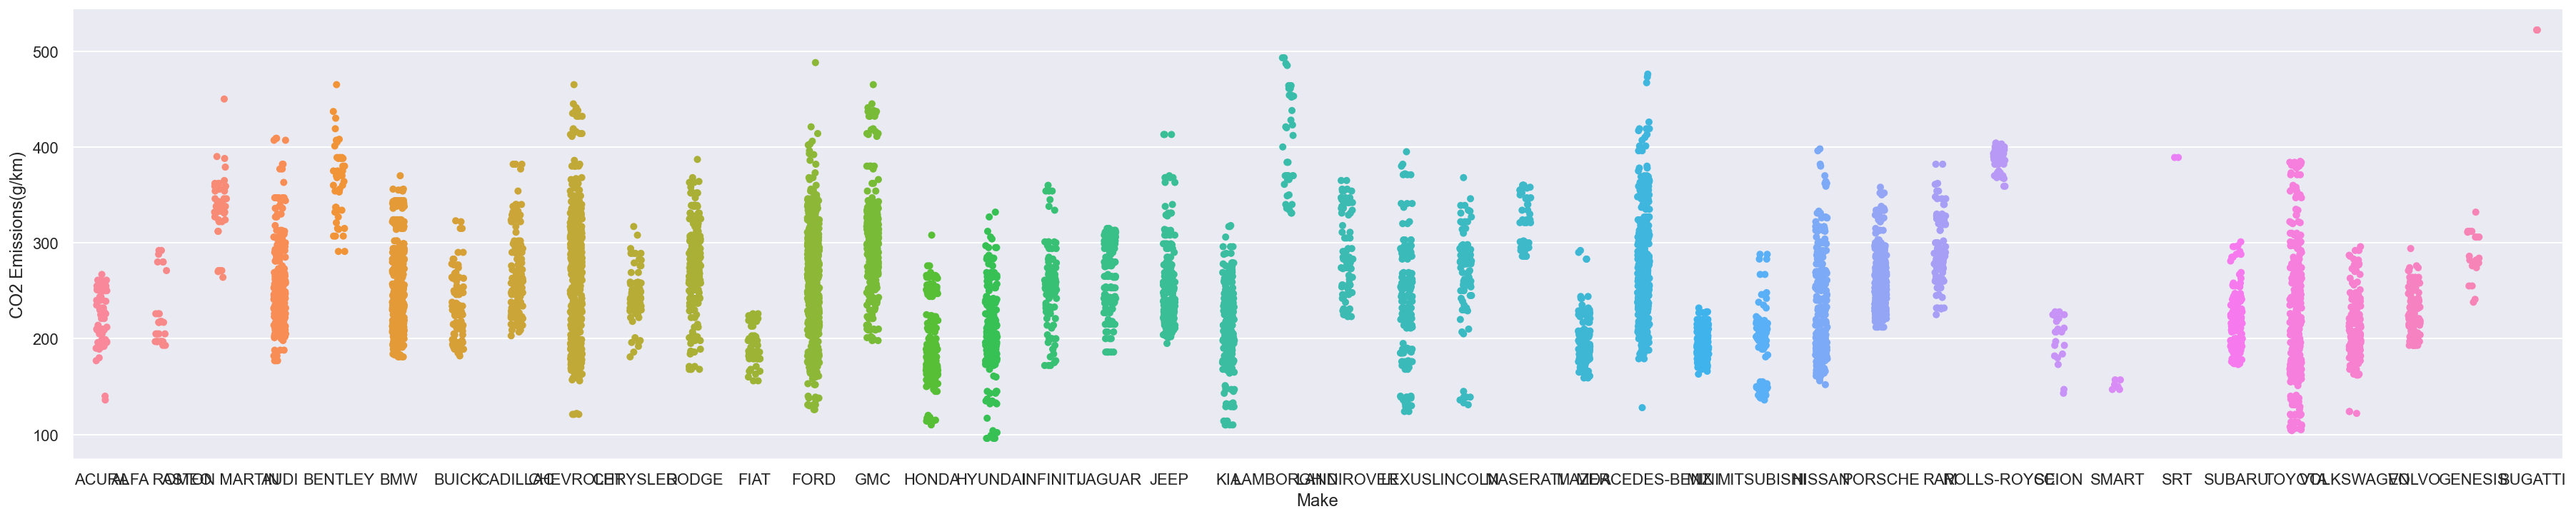

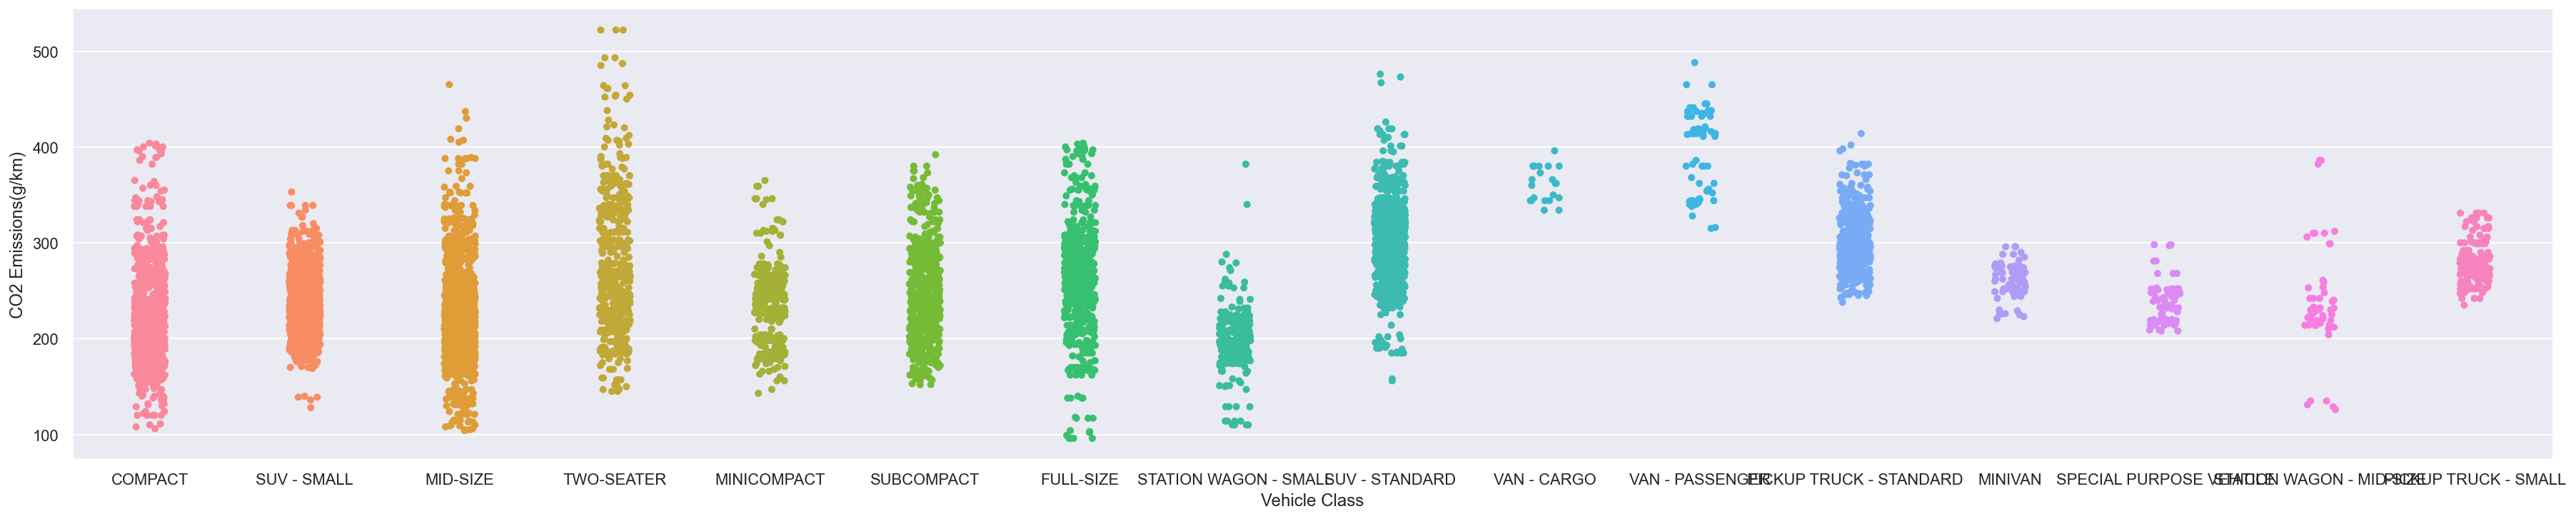

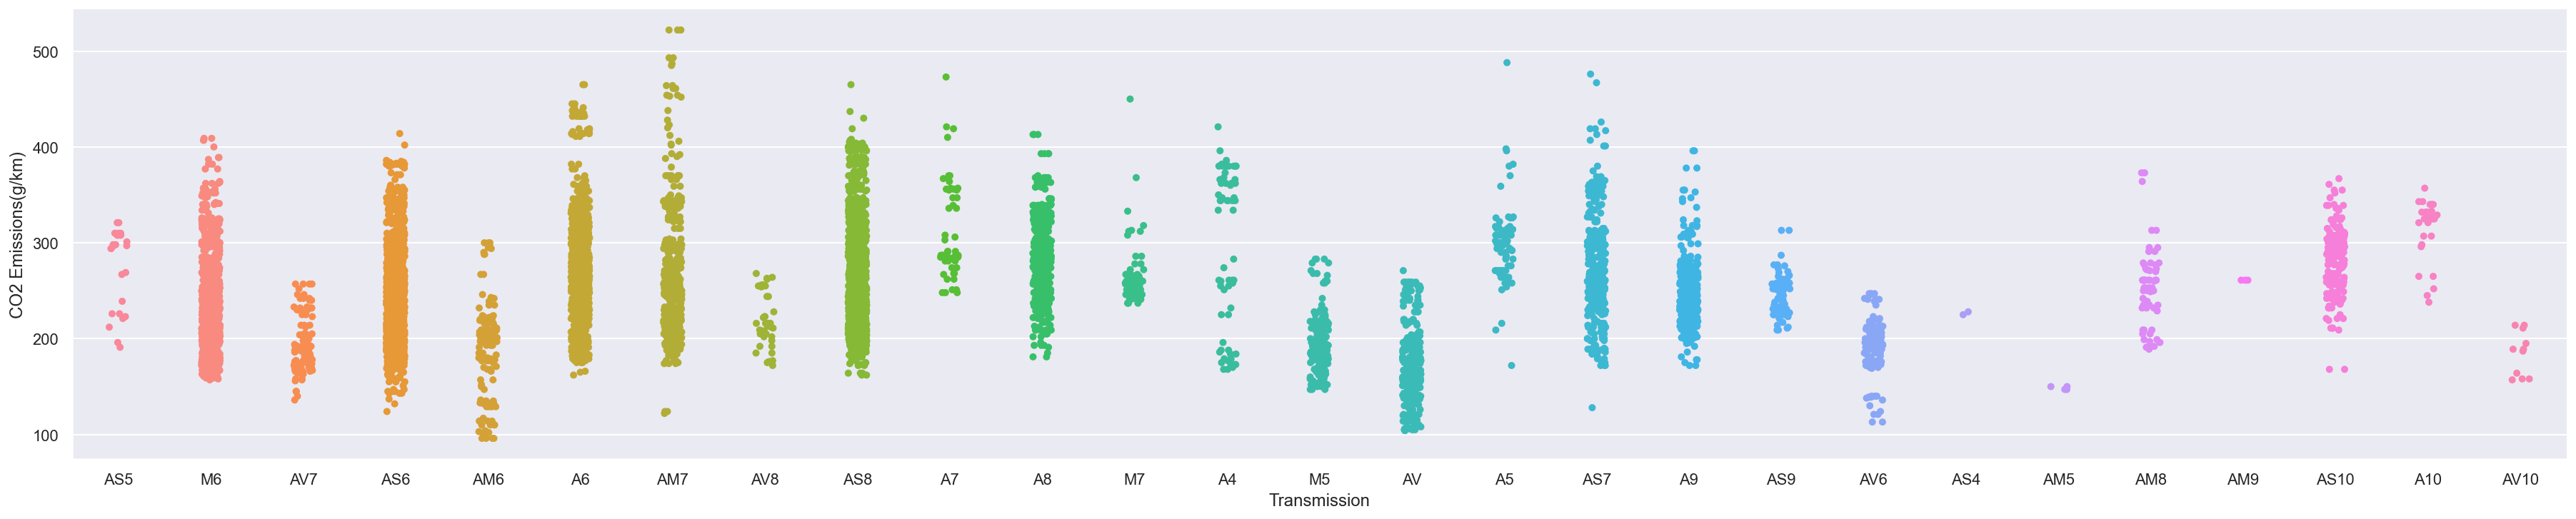

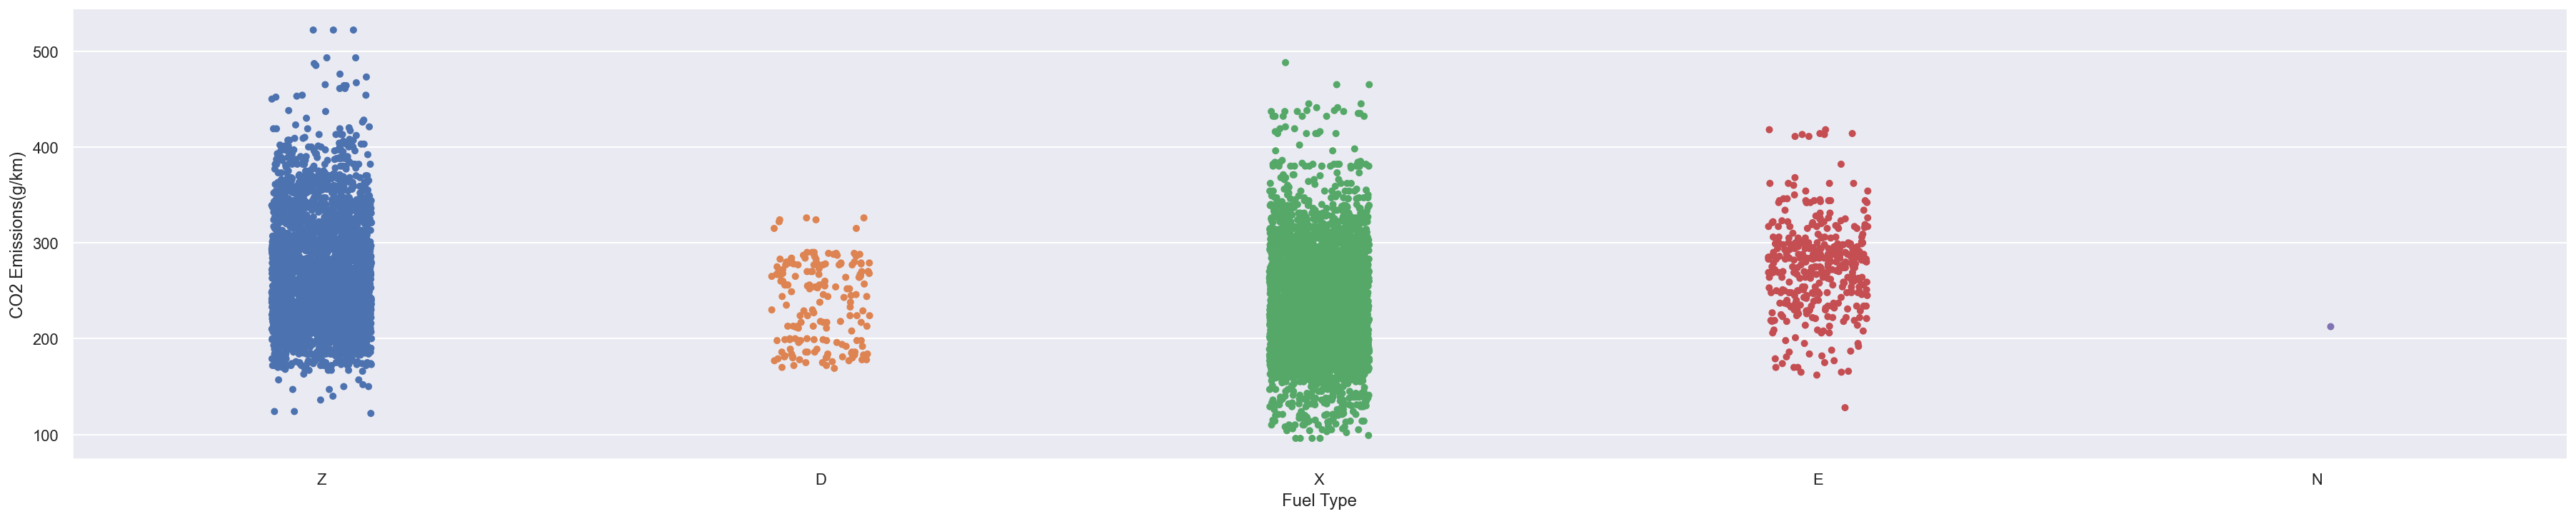

In [117]:
cat_data = data.select_dtypes(exclude=['float64', 'int64'])
col = cat_data.columns
col = col.drop('Model')
for feature in col:
    sns.catplot(x=feature, y='CO2 Emissions(g/km)', data=data, aspect=5)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

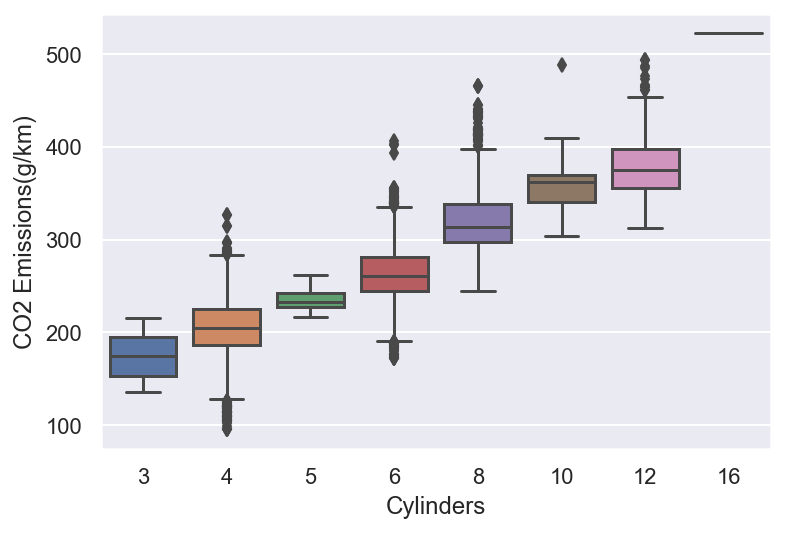

In [33]:
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data)

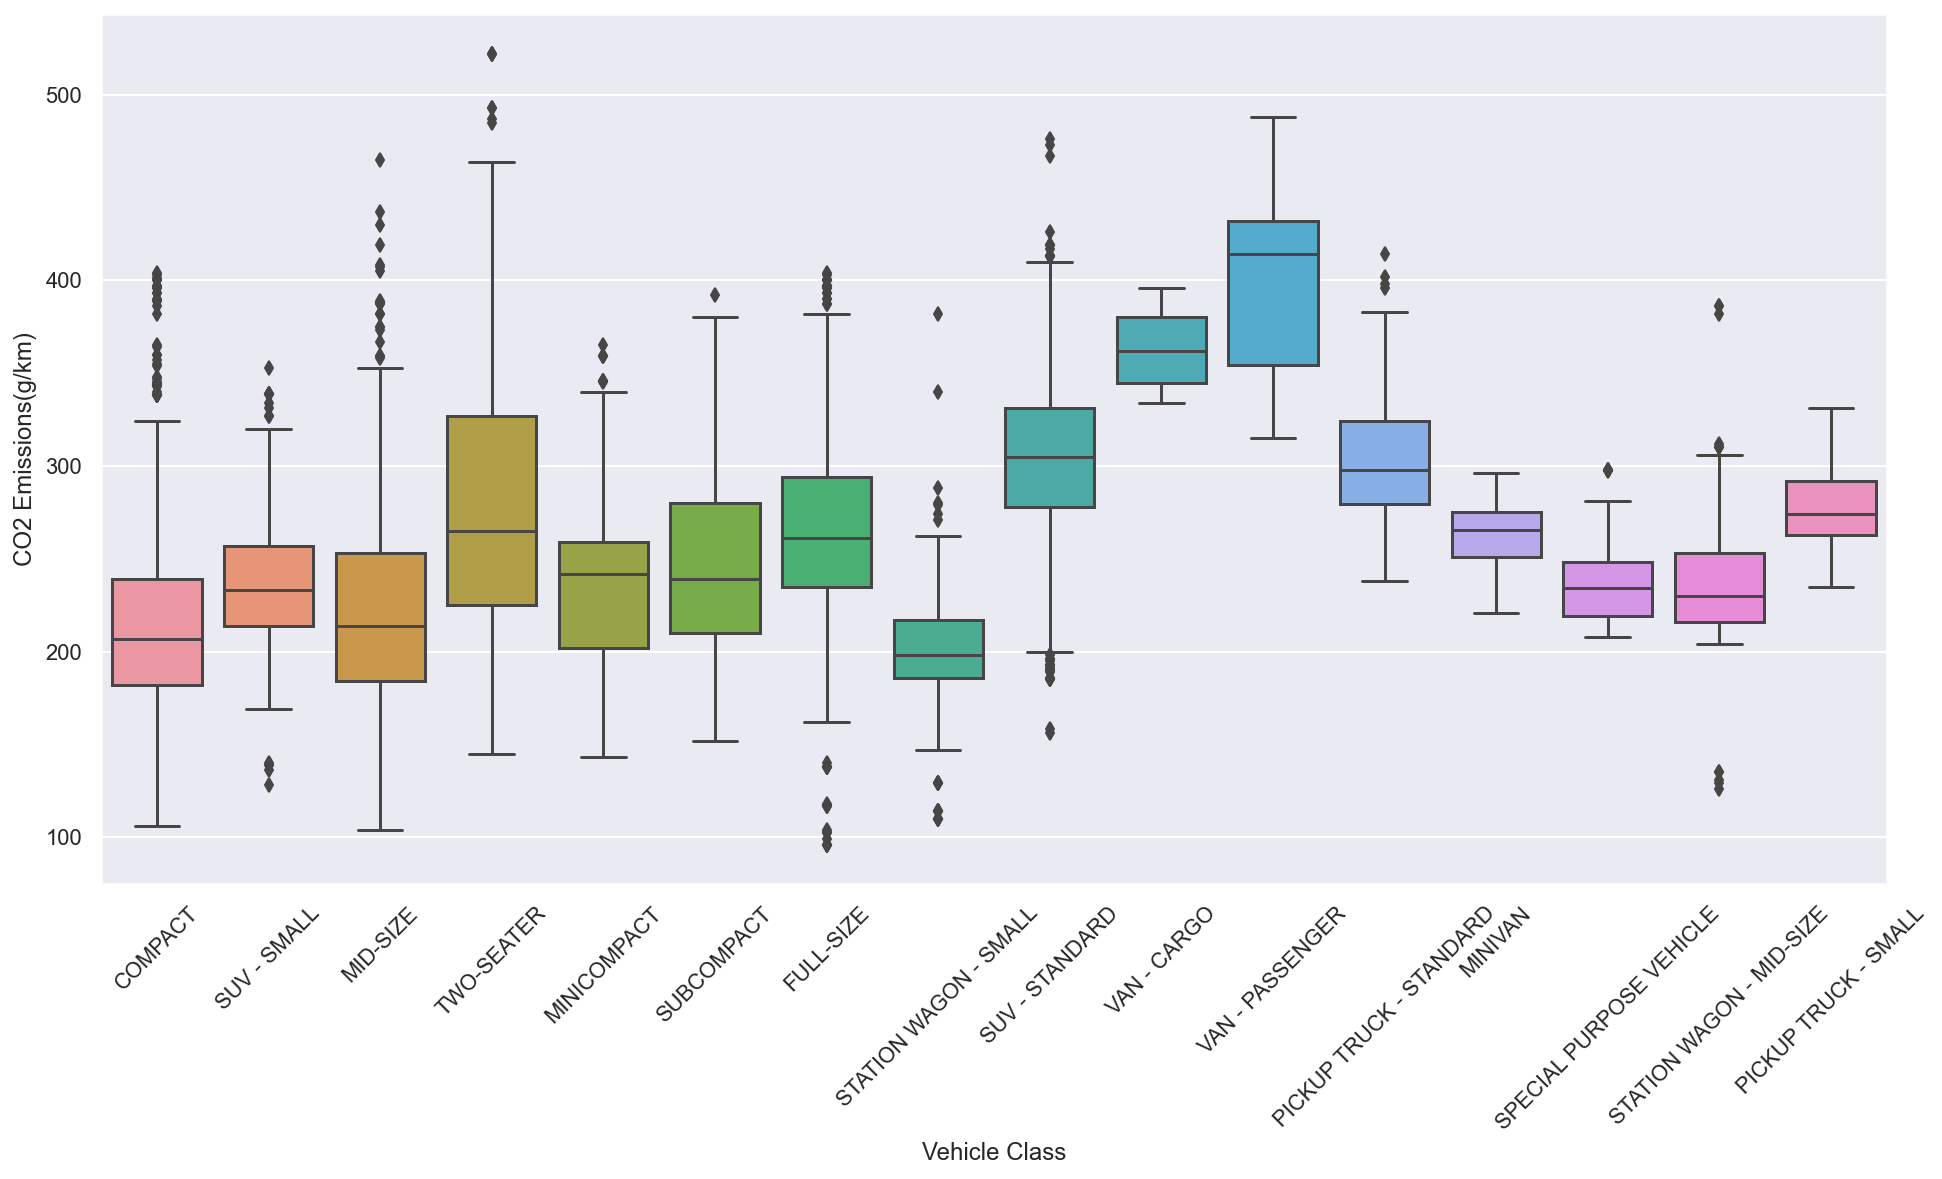

In [43]:
plt.figure(figsize=(16,8))
g = sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45);

## num data

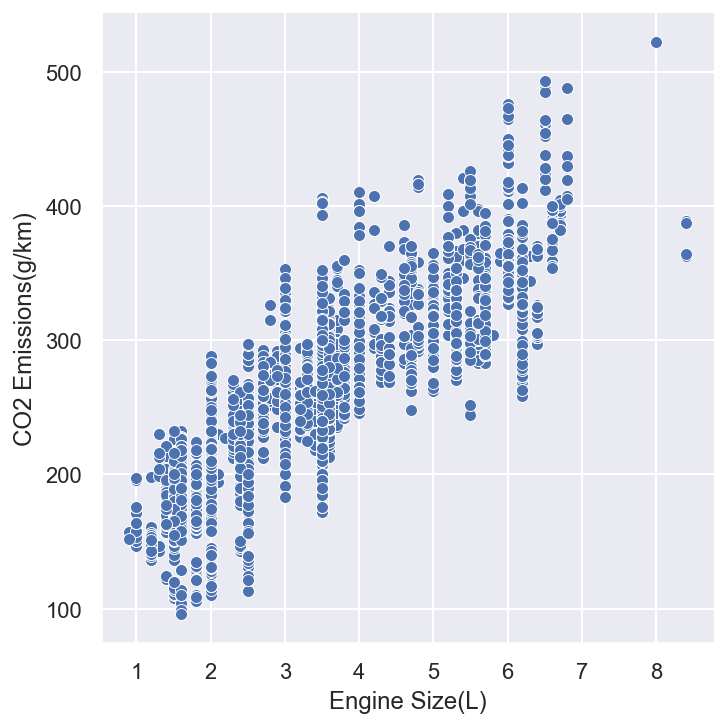

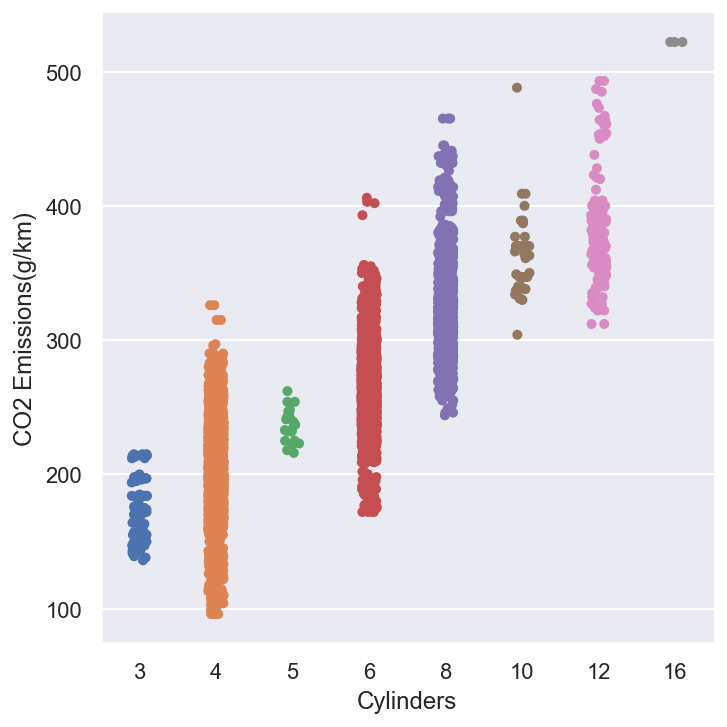

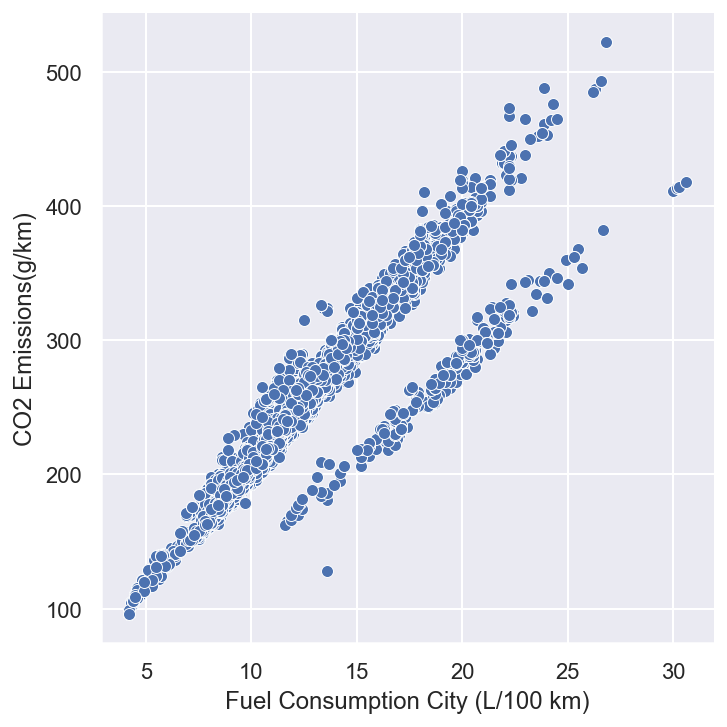

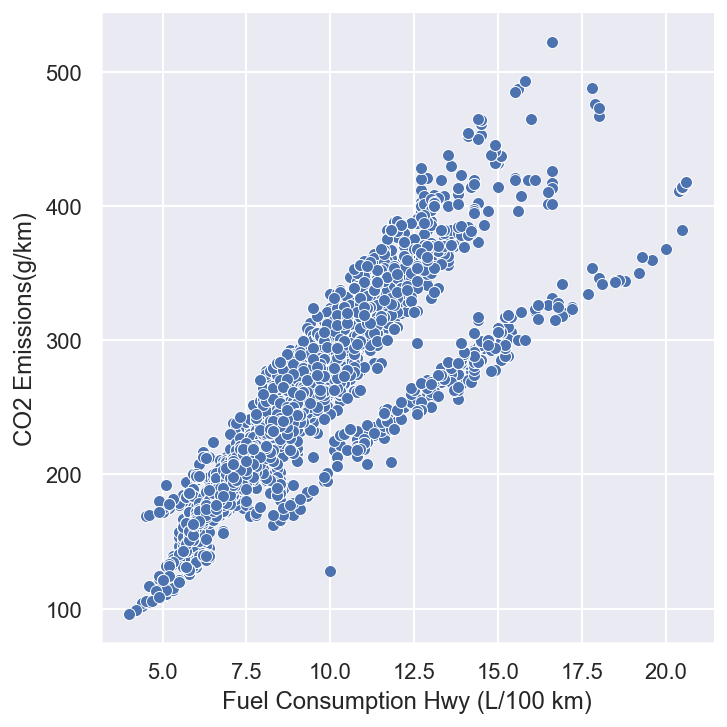

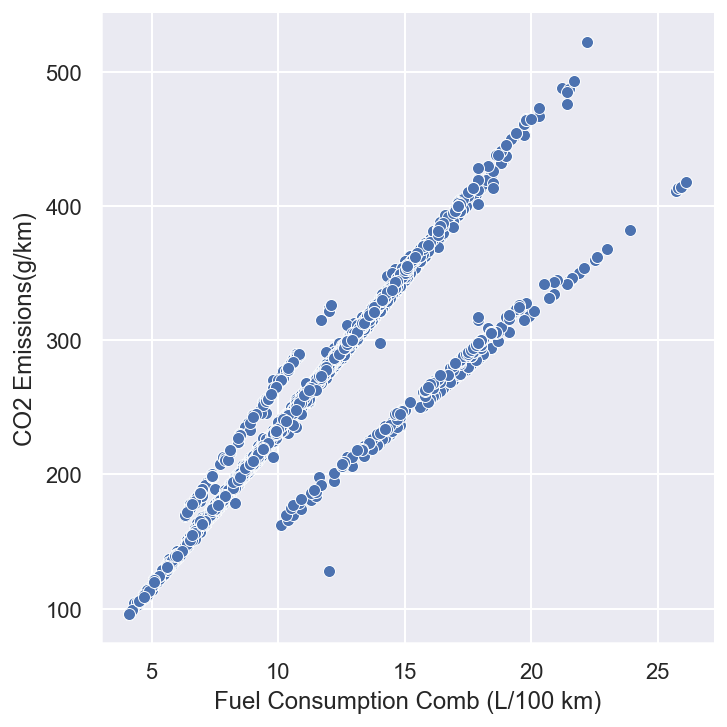

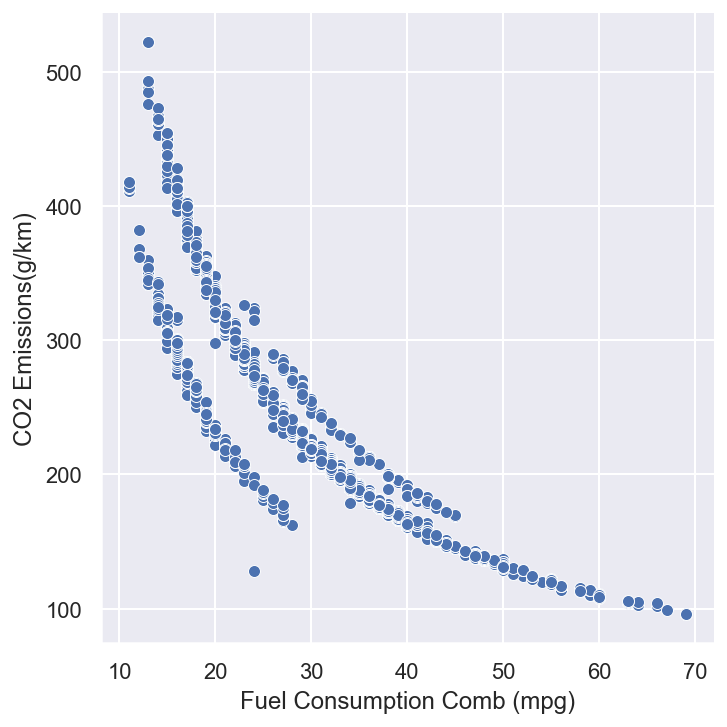

In [44]:
num_data = data.select_dtypes(include=['float64', 'int64'])
num_data = num_data.drop('CO2 Emissions(g/km)', axis=1)
col = num_data.columns
n_un = num_data.nunique()

for id, feature in enumerate(col):
    if n_un[id] < 30:
        sns.catplot(x=feature, y='CO2 Emissions(g/km)', data=data)
    else:
        sns.relplot(x=feature, y='CO2 Emissions(g/km)', data=data)

## 두 개로 갈린 부분이 있다

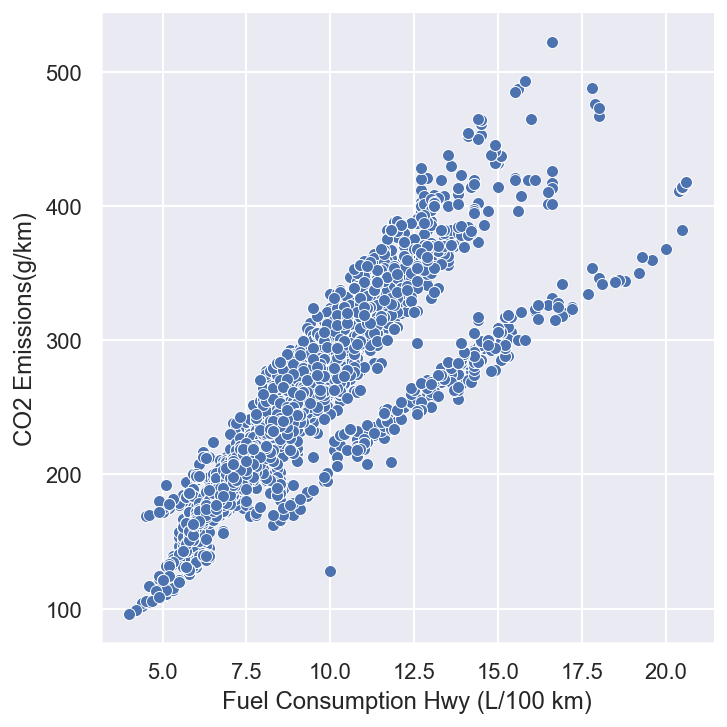

In [48]:
sns.relplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=data)